170498071/170498071 [==============================] - 744s 4us/step
Epoch 1/100
391/391 - 52s - loss: 1.6413 - accuracy: 0.3947 - val_loss: 1.3312 - val_accuracy: 0.5291 - 52s/epoch - 134ms/step
Epoch 2/100
391/391 - 49s - loss: 1.2699 - accuracy: 0.5439 - val_loss: 1.0905 - val_accuracy: 0.6193 - 49s/epoch - 126ms/step
Epoch 3/100
391/391 - 49s - loss: 1.0970 - accuracy: 0.6120 - val_loss: 0.9860 - val_accuracy: 0.6636 - 49s/epoch - 126ms/step
Epoch 4/100
391/391 - 49s - loss: 0.9885 - accuracy: 0.6525 - val_loss: 0.8737 - val_accuracy: 0.6957 - 49s/epoch - 125ms/step
Epoch 5/100
391/391 - 48s - loss: 0.9195 - accuracy: 0.6784 - val_loss: 0.8545 - val_accuracy: 0.7079 - 48s/epoch - 122ms/step
Epoch 6/100
391/391 - 48s - loss: 0.8564 - accuracy: 0.7011 - val_loss: 0.7843 - val_accuracy: 0.7304 - 48s/epoch - 122ms/step
Epoch 7/100
391/391 - 48s - loss: 0.8152 - accuracy: 0.7149 - val_loss: 0.7707 - val_accuracy: 0.7340 - 48s/epoch - 122ms/step
Epoch 8/100
391/391 - 48s - loss: 0.7727 -

Epoch 64/100
391/391 - 48s - loss: 0.2977 - accuracy: 0.8955 - val_loss: 0.6976 - val_accuracy: 0.7962 - 48s/epoch - 122ms/step
Epoch 65/100
391/391 - 48s - loss: 0.2965 - accuracy: 0.8951 - val_loss: 0.7098 - val_accuracy: 0.7907 - 48s/epoch - 121ms/step
Epoch 66/100
391/391 - 48s - loss: 0.2899 - accuracy: 0.8975 - val_loss: 0.6925 - val_accuracy: 0.7947 - 48s/epoch - 122ms/step
Epoch 67/100
391/391 - 47s - loss: 0.2844 - accuracy: 0.8995 - val_loss: 0.6909 - val_accuracy: 0.7996 - 47s/epoch - 121ms/step
Epoch 68/100
391/391 - 48s - loss: 0.2874 - accuracy: 0.8977 - val_loss: 0.6981 - val_accuracy: 0.7943 - 48s/epoch - 122ms/step
Epoch 69/100
391/391 - 48s - loss: 0.2884 - accuracy: 0.8977 - val_loss: 0.7098 - val_accuracy: 0.7930 - 48s/epoch - 121ms/step
Epoch 70/100
391/391 - 48s - loss: 0.2863 - accuracy: 0.8987 - val_loss: 0.7063 - val_accuracy: 0.7944 - 48s/epoch - 122ms/step
Epoch 71/100
391/391 - 48s - loss: 0.2809 - accuracy: 0.9005 - val_loss: 0.7210 - val_accuracy: 0.7926 -

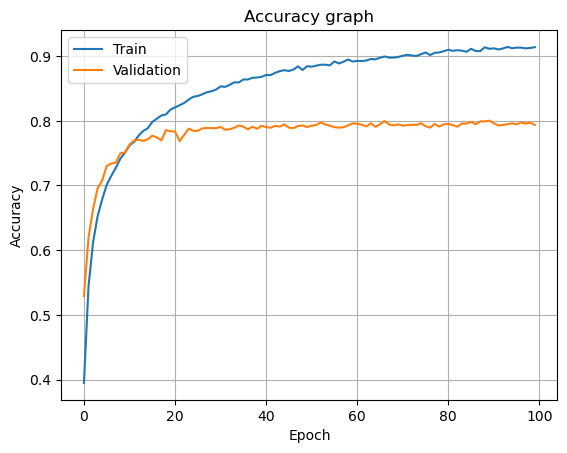

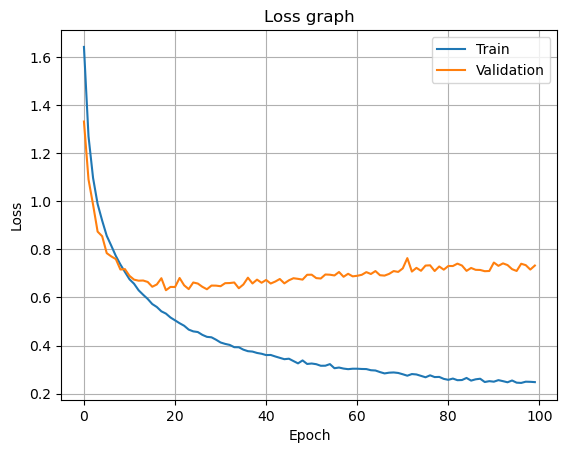

In [1]:
#연습문제 8-7
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data() 
x_train=x_train.astype(np.float32)/255.0 
x_test=x_test.astype(np.float32)/255.0 
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10) 


input = Input(shape=(32,32,3)) 
x1 = Conv2D(32,(3,3),activation='relu')(input) 
x1 = Conv2D(32,(3,3),activation='relu')(x1) 
x1 = MaxPooling2D(pool_size=(2,2))(x1) 
x1 = Dropout(0.25)(x1) 
x2 = Conv2D(64,(3,3),activation='relu')(x1) 
x2 = Conv2D(64,(3,3),activation='relu')(x1) 
x2 = MaxPooling2D(pool_size=(2,2))(x2) 
x2 = Dropout(0.25)(x2) 
x3 = Flatten()(x2)
x3 = Dense(units=512,activation='relu')(x3) 
x3 = Dropout(0.5)(x3)
output = Dense(units=10,activation='softmax')(x3) 
model = Model(input,output)

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

hist=model.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

res=model.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

정확률= 52.17999815940857
정확률= 57.70000219345093
정확률= 60.19999980926514
정확률= 62.55999803543091
정확률= 69.91999745368958
정확률= 69.80999708175659
정확률= 77.02999711036682
정확률= 77.97999978065491
정확률= 84.49000120162964
정확률= 87.8499984741211


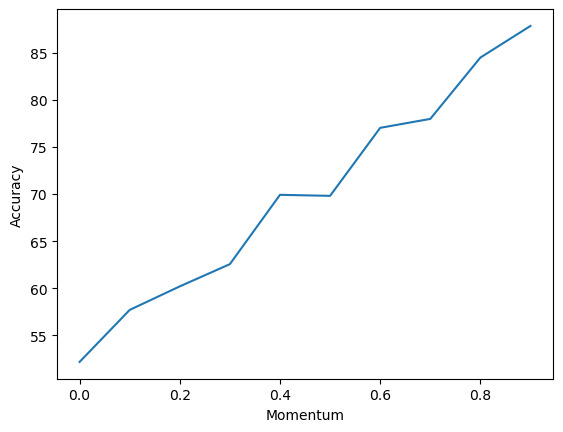

In [1]:
#연습문제 8-9
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data() 
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train = x_train.astype(np.float32) / 255.0 
x_test = x_test.astype(np.float32) / 255.0 
y_train = tf.keras.utils.to_categorical(y_train, 10)  
y_test = tf.keras.utils.to_categorical(y_test, 10) 

momentum_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
accuracies = []
for momentum in momentum_values:
    mlp = Sequential()
    mlp.add(Dense(units=512, activation='tanh', input_shape=(784,))) 
    mlp.add(Dense(units=10, activation='softmax')) 

    sgd = SGD(learning_rate=0.01, momentum=momentum) 
        
    mlp.compile(loss='MSE', optimizer=sgd, metrics=['accuracy']) 
    mlp.fit(x_train, y_train, batch_size=128, epochs=3, validation_data=(x_test, y_test), verbose=0) 
    
    res = mlp.evaluate(x_test, y_test, verbose=0)
    accuracies.append(res[1] * 100)
    print('정확률=',res[1]*100)

plt.plot(momentum_values, accuracies)
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.show()